# 多层感知机的简洁实现

通过高级API更简洁地实现多层感知机

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

隐藏层
包含256个隐藏单元，并使用了ReLU激活函数

In [3]:
# 2个全连接层，输出层不要激活
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

训练过程

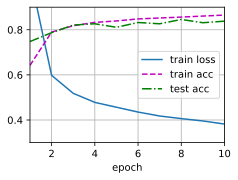

In [4]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

以下是自己实现

In [1]:
from torch.utils.tensorboard import SummaryWriter

# 创建一个TensorBoard writer 实例
# shell中输入tensorboard --logdir=runs
writer = SummaryWriter('runs/your_experiment_name')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

In [4]:
batch_size, lr, num_epochs = 256, 0.01, 20
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

torch.Size([1, 28, 28])


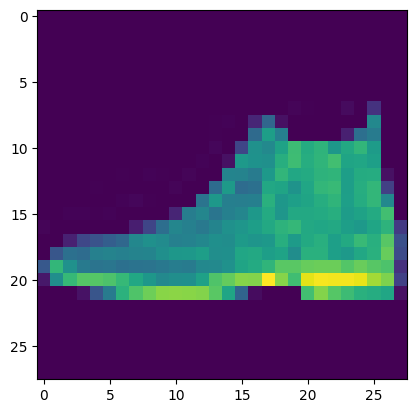

In [8]:
import matplotlib.pyplot as plt
for x, y in test_iter:
    image = x[0]
    print(image.shape)
    # permute() 函数来改变维度的顺序。PyTorch的图像张量形状是 (C, H, W)，需要转换为 (H, W, C)
    image_permute = image.permute(1, 2, 0)
    plt.imshow(image_permute)
    plt.show()
    break

In [5]:
# 训练集
for i in range(num_epochs):
    net.train()
    for x, y in train_iter:
        trainer.zero_grad()
        net_y = net(x)
        l = loss(net_y, y)
        l.backward()
        trainer.step()

    with torch.no_grad():
        print(f'epoch {i + 1}, loss {l.item():.6f}')
        predicted = net_y.argmax(dim=1)
        precision = (predicted == y).sum().item() / y.size(0)
        print(f'epoch {i + 1}, precision {precision:.6f}')
        # 记录到TensorBoard中
        writer.add_scalar('Loss/Train', l.item(), i)
        writer.add_scalar('Accuracy/Train', precision, i)
writer.close()

epoch 1, loss 1.891545
epoch 1, precision 0.447917
epoch 2, loss 1.242902
epoch 2, precision 0.656250
epoch 3, loss 1.190855
epoch 3, precision 0.562500
epoch 4, loss 1.014501
epoch 4, precision 0.625000
epoch 5, loss 0.809618
epoch 5, precision 0.666667
epoch 6, loss 0.838080
epoch 6, precision 0.645833
epoch 7, loss 0.872165
epoch 7, precision 0.677083
epoch 8, loss 0.666505
epoch 8, precision 0.802083
epoch 9, loss 0.650277
epoch 9, precision 0.791667
epoch 10, loss 0.692817
epoch 10, precision 0.760417
epoch 11, loss 0.533344
epoch 11, precision 0.822917
epoch 12, loss 0.630470
epoch 12, precision 0.770833
epoch 13, loss 0.700360
epoch 13, precision 0.781250
epoch 14, loss 0.612607
epoch 14, precision 0.781250
epoch 15, loss 0.561658
epoch 15, precision 0.822917
epoch 16, loss 0.538107
epoch 16, precision 0.770833
epoch 17, loss 0.546981
epoch 17, precision 0.854167
epoch 18, loss 0.624928
epoch 18, precision 0.791667
epoch 19, loss 0.317680
epoch 19, precision 0.906250
epoch 20, l

In [56]:
for x, y in train_iter:
    print(y, y.shape, y.unique())   # 查看y的值和形状和唯一值
    print(net(x).argmax(dim=1), net(x).argmax(dim=1).shape)  # 查看输出及形状
    break

tensor([4, 6, 4, 6, 1, 9, 5, 8, 8, 4, 1, 0, 9, 4, 6, 1, 9, 0, 1, 7, 6, 7, 2, 8,
        7, 1, 7, 8, 8, 9, 0, 2, 1, 2, 2, 7, 4, 4, 0, 1, 3, 4, 4, 9, 3, 6, 8, 4,
        9, 4, 5, 5, 3, 4, 2, 8, 5, 9, 3, 7, 1, 5, 8, 9, 4, 0, 6, 4, 2, 8, 8, 1,
        4, 9, 4, 7, 9, 1, 7, 9, 6, 5, 9, 7, 9, 8, 3, 2, 6, 8, 6, 6, 2, 9, 9, 1,
        9, 0, 2, 4, 5, 2, 1, 8, 6, 6, 7, 3, 5, 5, 0, 9, 0, 2, 1, 6, 0, 9, 3, 0,
        8, 1, 2, 2, 3, 4, 2, 2, 3, 7, 8, 4, 8, 0, 5, 3, 8, 5, 2, 8, 8, 2, 2, 5,
        5, 8, 4, 6, 6, 5, 0, 6, 0, 5, 4, 1, 2, 3, 0, 6, 5, 2, 4, 6, 2, 1, 5, 9,
        3, 2, 5, 8, 1, 3, 9, 8, 4, 5, 4, 5, 9, 4, 4, 4, 8, 0, 0, 2, 1, 6, 1, 0,
        7, 4, 1, 7, 3, 2, 7, 5, 7, 1, 4, 2, 4, 2, 5, 6, 0, 7, 0, 1, 3, 7, 8, 9,
        2, 0, 1, 9, 7, 5, 3, 0, 2, 8, 3, 3, 4, 8, 6, 0, 8, 7, 3, 7, 5, 6, 1, 8,
        0, 7, 6, 4, 0, 3, 9, 6, 3, 8, 3, 3, 0, 6, 0, 0]) torch.Size([256]) tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([4, 6, 4, 6, 1, 9, 5, 8, 8, 4, 1, 0, 9, 4, 6, 1, 9, 0, 1, 9, 6, 7, 2, 8,
      

In [57]:
# 测试集
with torch.no_grad():
    net.eval()  
    for x, y in test_iter:
        net_y = net(x)
        predicted = net_y.argmax(dim=1)
        precision = (predicted == y).sum().item() / y.size(0)
        print(f'precision {precision:.6f}')

precision 0.843750
precision 0.855469
precision 0.835938
precision 0.839844
precision 0.839844
precision 0.843750
precision 0.855469
precision 0.835938
precision 0.839844
precision 0.820312
precision 0.824219
precision 0.808594
precision 0.789062
precision 0.820312
precision 0.824219
precision 0.820312
precision 0.820312
precision 0.894531
precision 0.808594
precision 0.800781
precision 0.843750
precision 0.796875
precision 0.812500
precision 0.839844
precision 0.828125
precision 0.796875
precision 0.812500
precision 0.824219
precision 0.835938
precision 0.859375
precision 0.824219
precision 0.804688
precision 0.835938
precision 0.812500
precision 0.796875
precision 0.808594
precision 0.828125
precision 0.820312
precision 0.855469
precision 0.875000
